<a href="https://colab.research.google.com/github/ImSumitJadhav/Mobile-Price-Range-Prediction/blob/main/Mobile_Price_Prediction_CLASS_(ML).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#<font color='red'> **Project Name-Prediction of mobile price range**

#<font color='blue'> **Problem Statement**

<font color='blue'>In the competitive mobile phone market companies want
to understand sales data of mobile phones and factors which drive the prices.
The objective is to find out some relation between features of a mobile phone(eg:- RAM,
Internal Memory, etc) and its selling price. In this problem, we do not have to predict the
actual price but a price range indicating how high the price is.

##<font color='red'> **Let's Go.....**

In [1]:
#import library and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')

from google.colab import drive

In [2]:
drive.mount('/content/MyDrive')  #import drive
df=pd.read_csv('/content/MyDrive/MyDrive/Project 3/data_mobile_price_range.csv') #import file and encoded

Mounted at /content/MyDrive


In [3]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [47]:
df.tail()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,...,483,754,3919,19,4,2,1,1,1,3


In [4]:
df.shape

(2000, 21)

In [5]:
df.describe()  #To get information about dataset

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


#<font color='blue'> **Data Description**

Battery_power - Total energy a battery can store in one time measured in mAh

Blue - Has bluetooth or not

Clock_speed - speed at which microprocessor executes instructions

Dual_sim - Has dual sim support or not

Fc - Front Camera mega pixels

Four_g - Has 4G or not

Int_memory - Internal Memory in Gigabytes

M_dep - Mobile Depth in cm

Mobile_wt - Weight of mobile phone

N_cores - Number of cores of processor

Pc - Primary Camera mega pixels

Px_height - Pixel Resolution Height

Px_width - Pixel Resolution Width

Ram - Random Access Memory in Mega Bytes

Sc_h - Screen Height of mobile in cm

Sc_w - Screen Width of mobile in cm

Talk_time - longest time that a single battery charge will last when you are

Three_g - Has 3G or not

Touch_screen - Has touch screen or not

Wifi - Has wifi or not

Price_range - This is the target variable with value of 0(low cost), 1(medium cost),2(high cost) and 3(very high cost).

<font color='blue'>**Finding NaN values in the Dataset**

In [6]:
#Find NaN values
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [7]:
#To get all data types in dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

#<font color='red'> **Data Visualization**

In [8]:
column_names=df.columns    #To show column names
column_names

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [9]:
df1=df.copy()   #To find numerical featuers
df1=df1.drop(["blue","dual_sim","four_g","three_g","touch_screen","wifi","price_range"],axis=True)
numerical_features=df1.columns
numerical_features

Index(['battery_power', 'clock_speed', 'fc', 'int_memory', 'm_dep',
       'mobile_wt', 'n_cores', 'pc', 'px_height', 'px_width', 'ram', 'sc_h',
       'sc_w', 'talk_time'],
      dtype='object')

<font color='blue'>**A)To find Correlation between features**

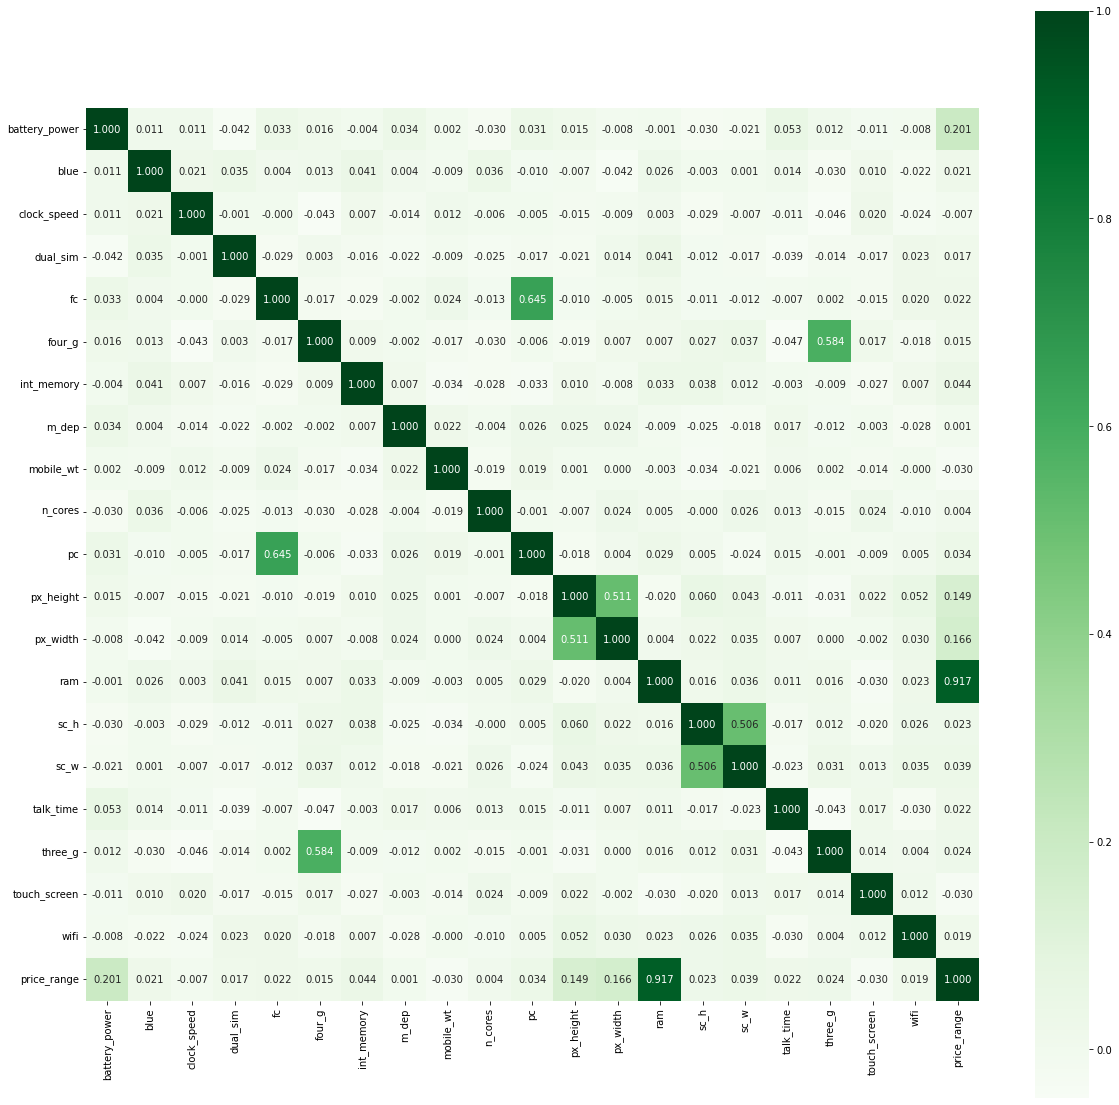

In [10]:
correalation=df.corr()  #Correlation
plt.figure(figsize=(20,20))
sns.heatmap(correalation,cbar=True,square=True,fmt=".3f",annot=True,annot_kws={"size":10}, cmap="Greens")

# **From above heat diagram we clearly find,only "ram" feature has more correlation value with our dependent variable "price_range.**

Text(0.5, 1.0, 'Price_range Vs Density')

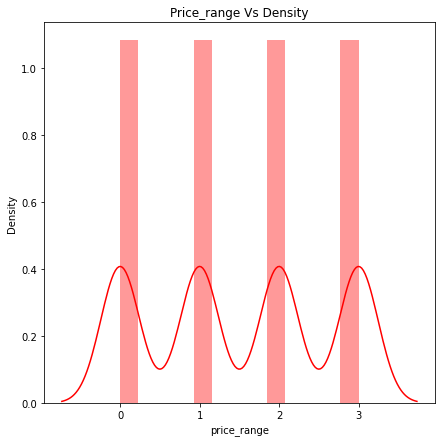

In [11]:
# Dependent variable 'Price'
plt.figure(figsize=(7,7))
sns.distplot(df['price_range'],color="r")
plt.title("Price_range Vs Density")

##<font color='blue'> **B)Count of mobiles by each feature**

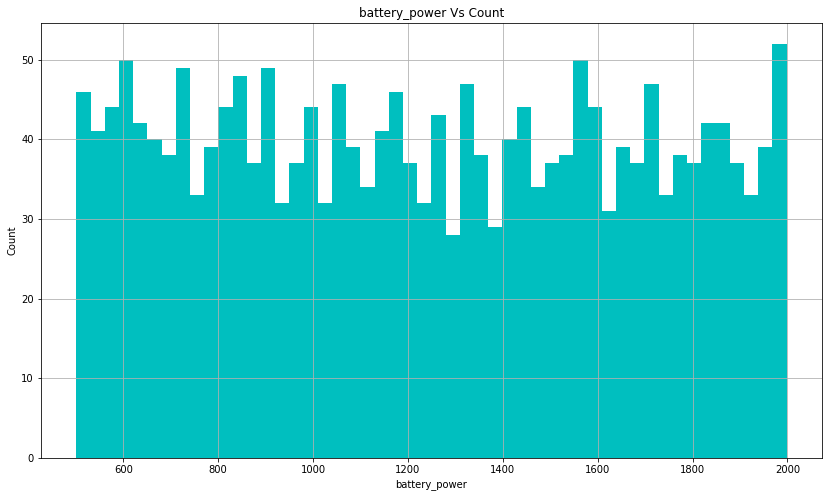

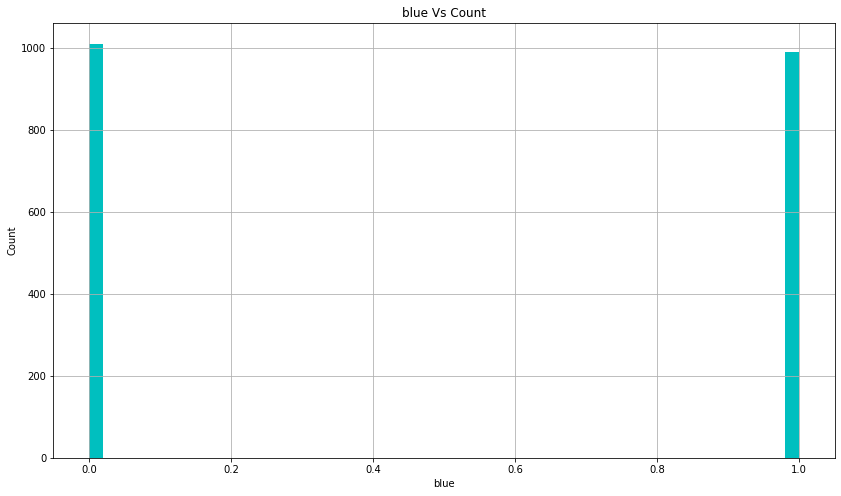

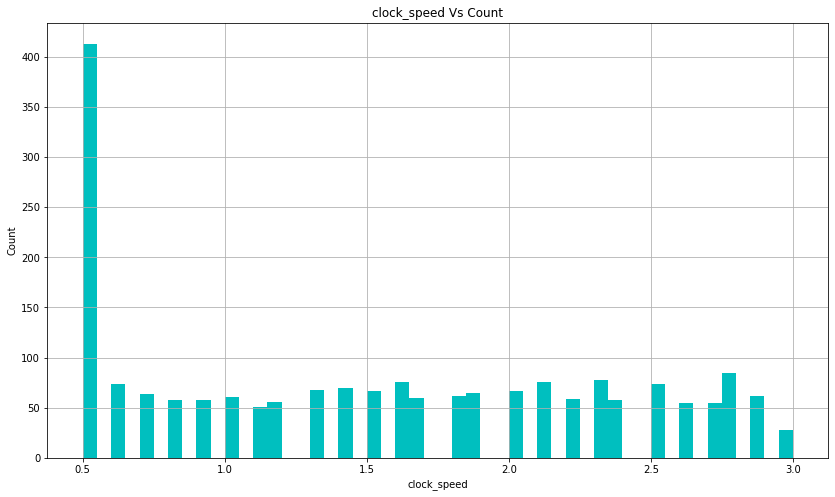

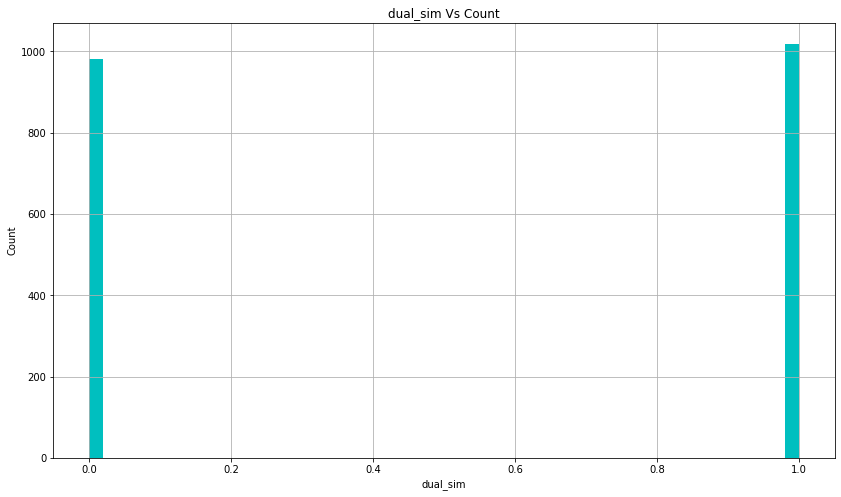

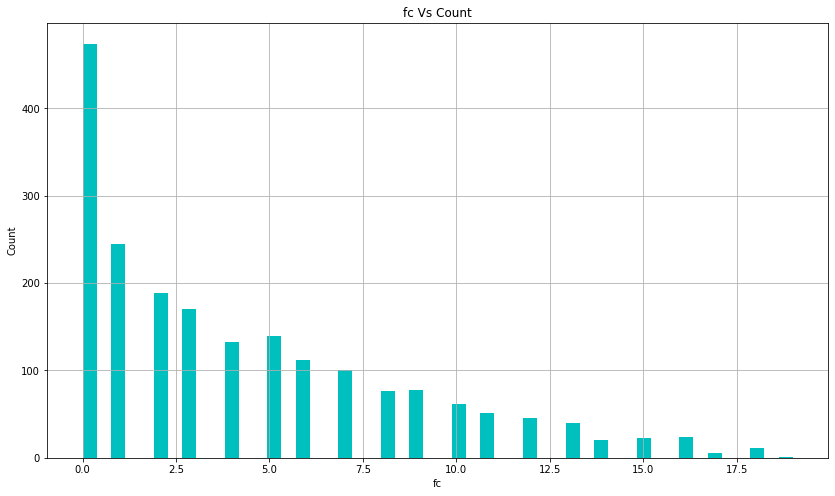

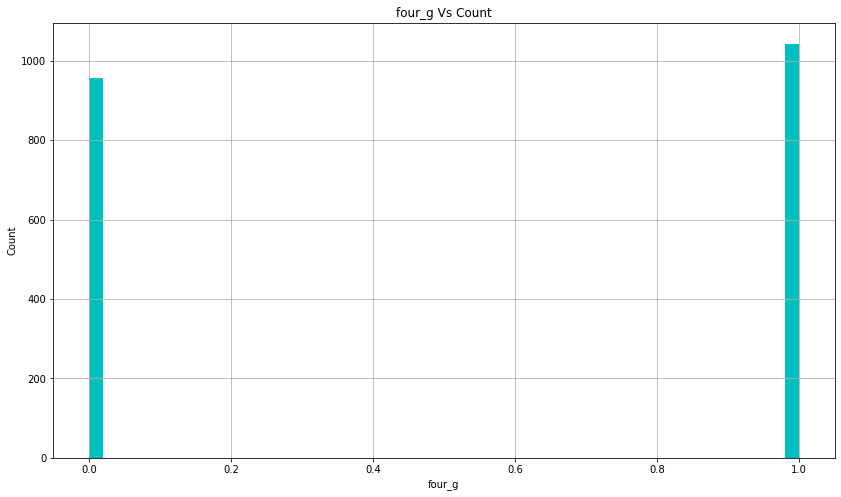

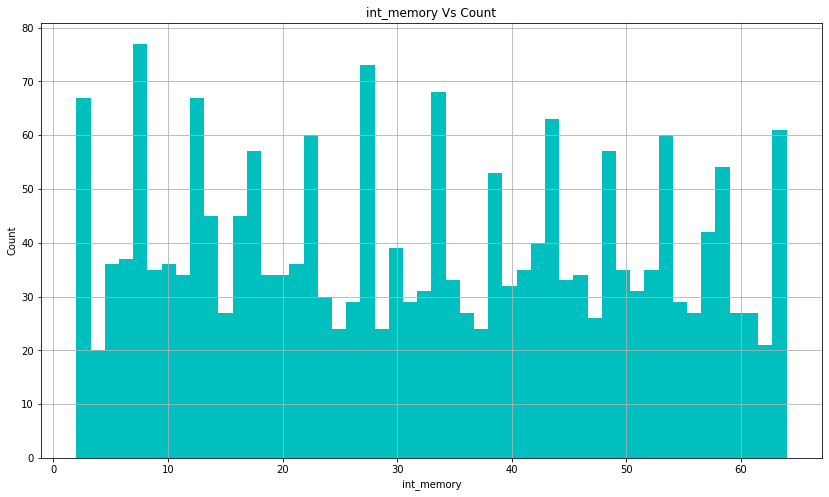

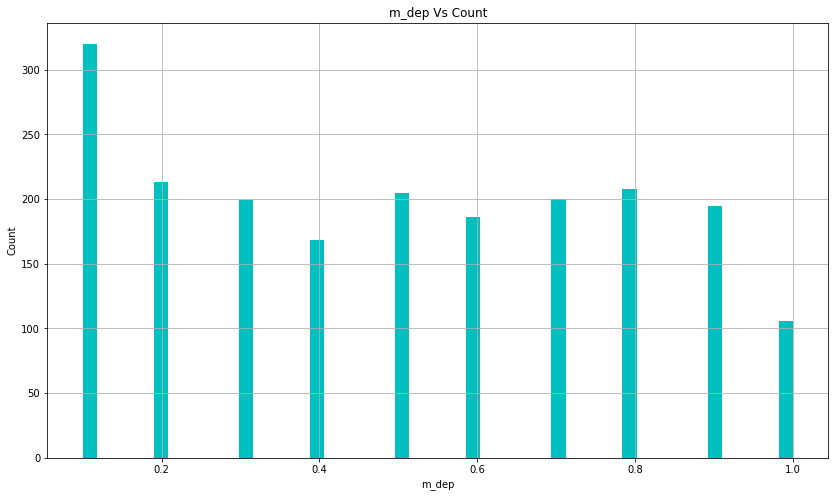

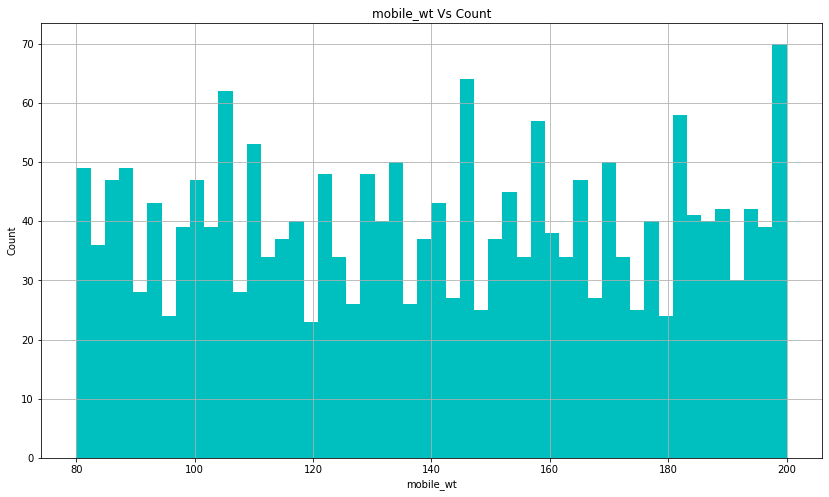

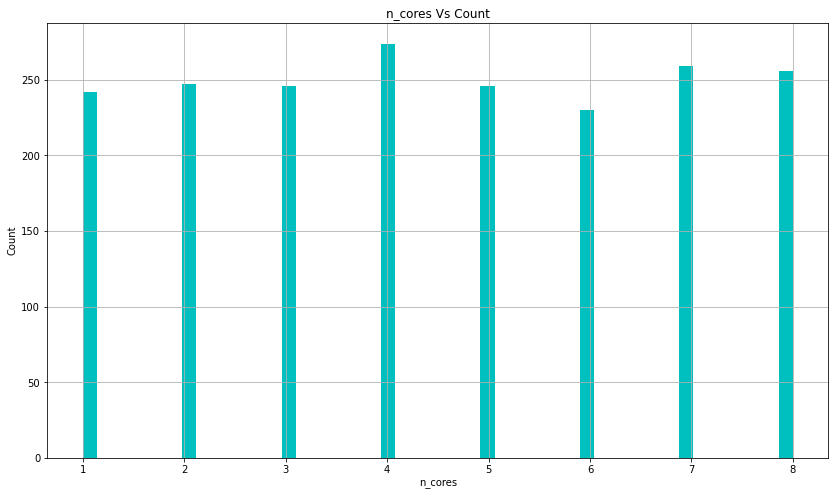

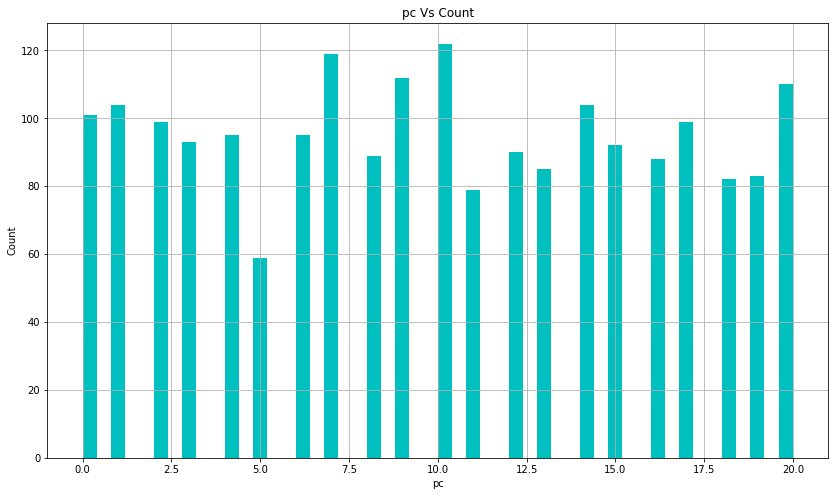

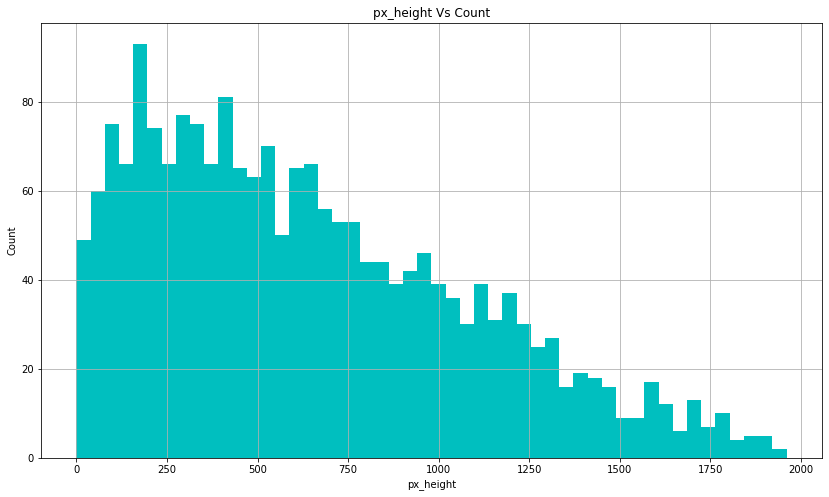

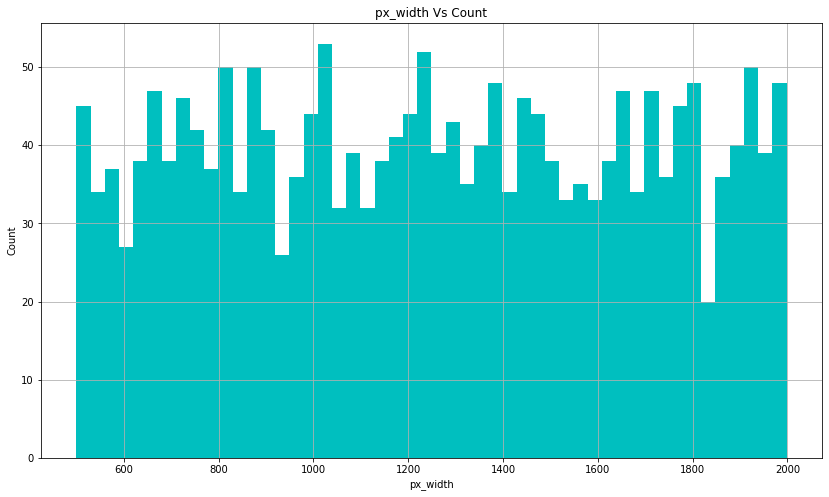

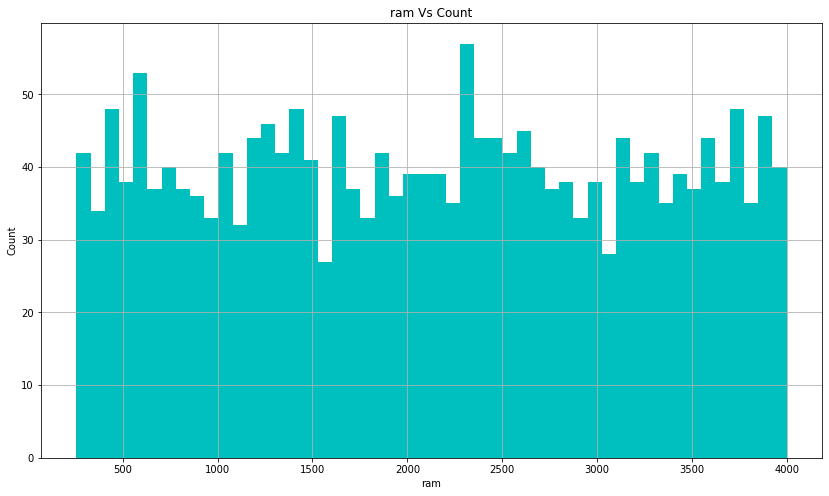

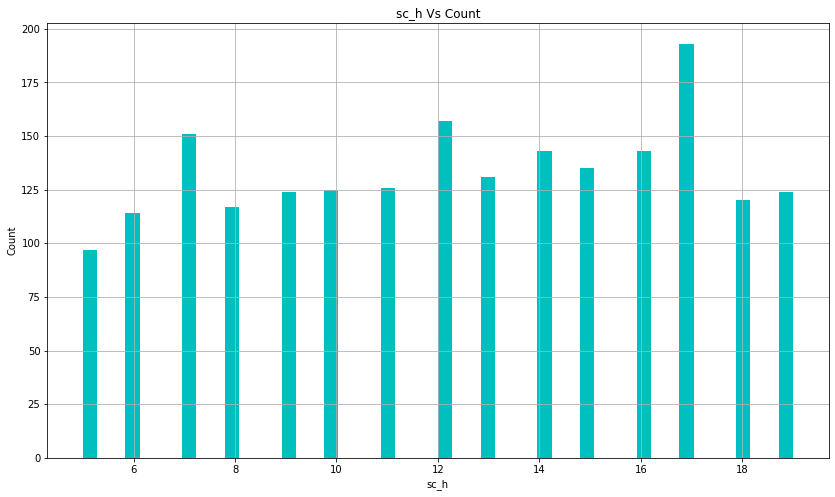

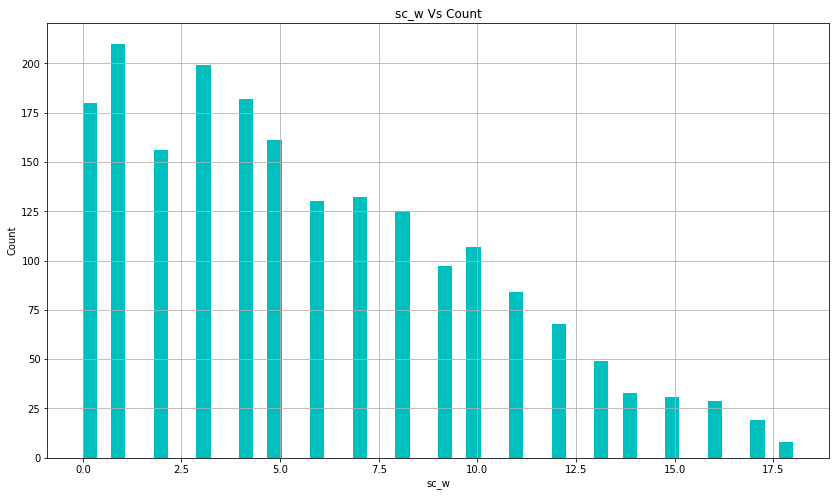

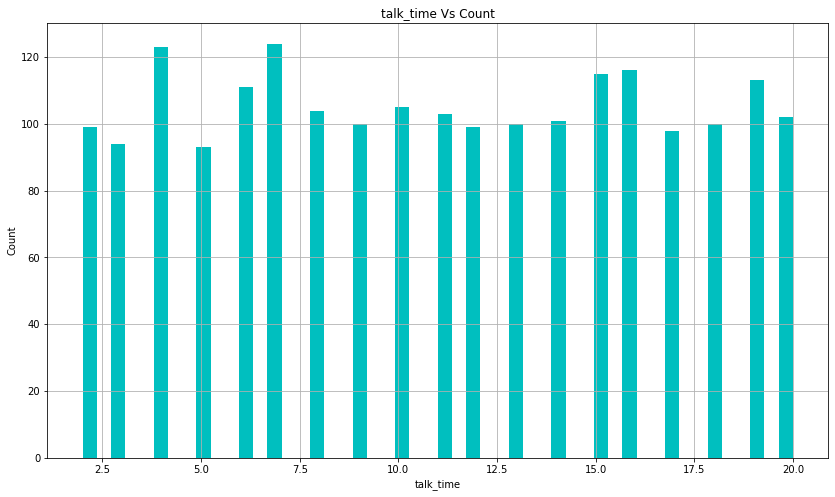

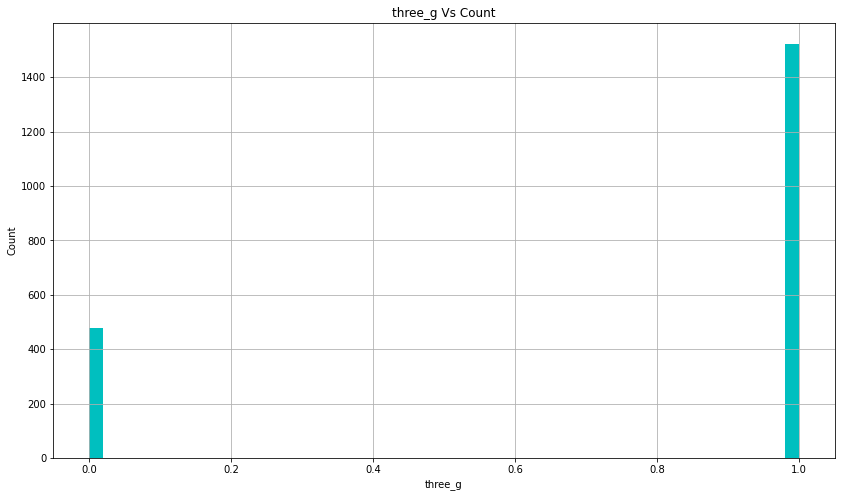

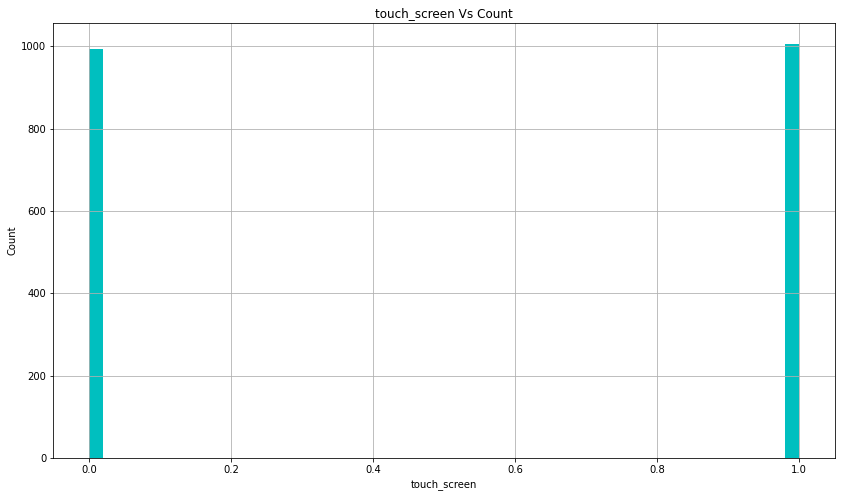

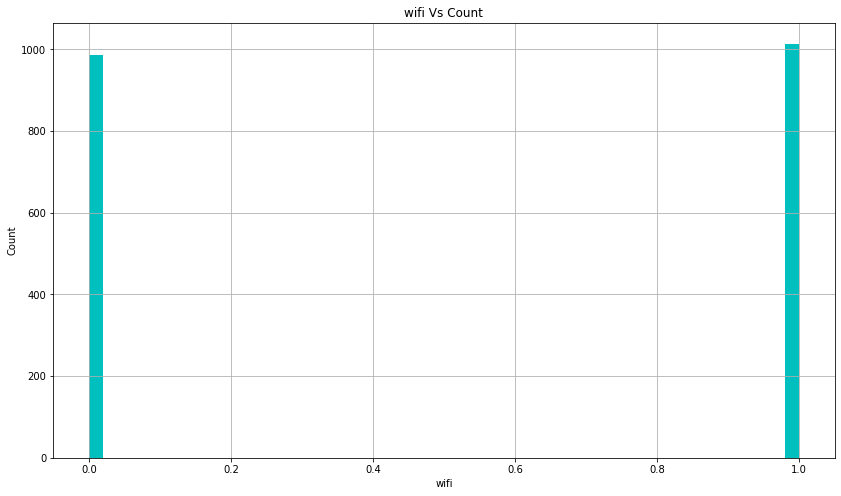

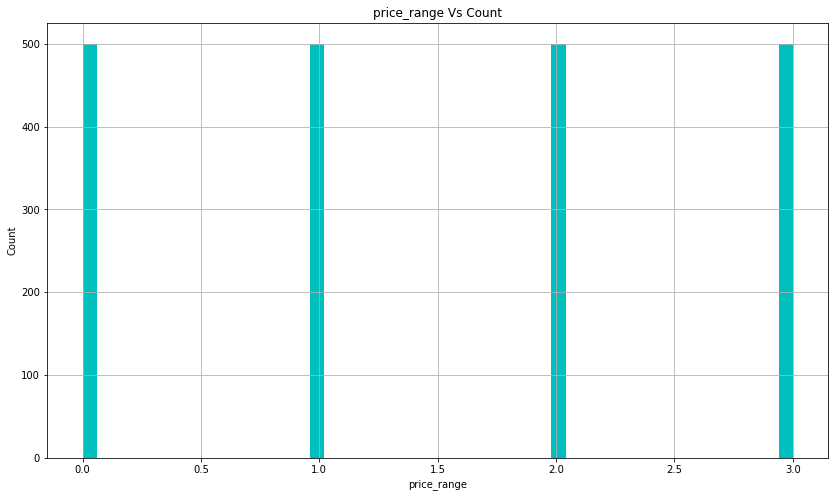

In [12]:
for col in column_names:             
    fig = plt.figure(figsize=(14, 8))  #to plot count of numericals featuers
    ax = fig.gca()
    feature = df[col]
    feature.hist(bins=50, ax = ax,color="c")  
    plt.xlabel(col)
    plt.ylabel('Count')  
    ax.set_title(col+" "+"Vs"+" "+"Count")
plt.show()

In [13]:
labled_columns=["blue","dual_sim","four_g","three_g","touch_screen","wifi"]  #labled features

<Figure size 1008x576 with 0 Axes>

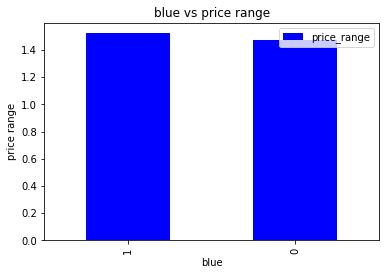

<Figure size 1008x576 with 0 Axes>

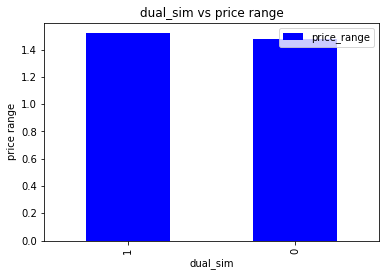

<Figure size 1008x576 with 0 Axes>

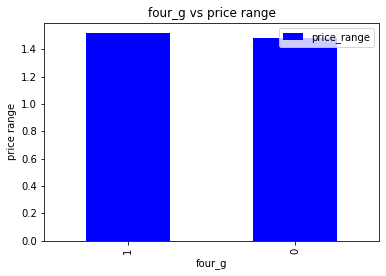

<Figure size 1008x576 with 0 Axes>

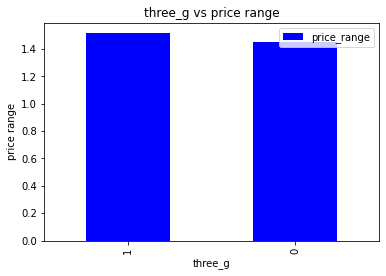

<Figure size 1008x576 with 0 Axes>

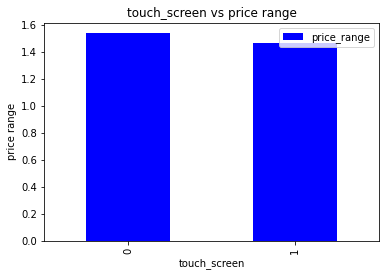

<Figure size 1008x576 with 0 Axes>

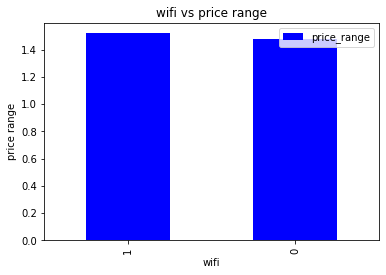

In [14]:
for col in labled_columns:             
    fig = plt.figure(figsize=(14, 8))
    df_autox = pd.DataFrame(df.groupby([col])["price_range"].mean().sort_values(ascending = False)) #grouped by "labled_columns" list and "price_range"
    df_autox.plot.bar(color="b")
    plt.ylabel('price range') 
    plt.title(col+' vs price range')
plt.show()

<font color='blue'>**C)To better visualization we plot joint plot**

**With these joint plot we found count of mobile with each perticuler price range.**

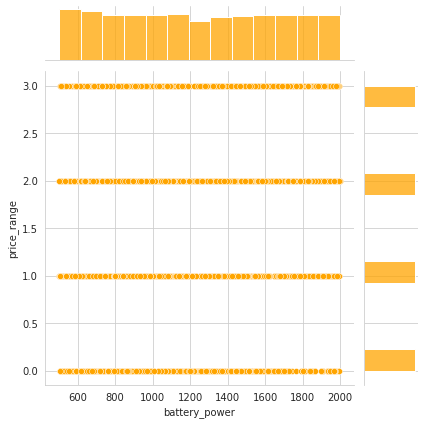

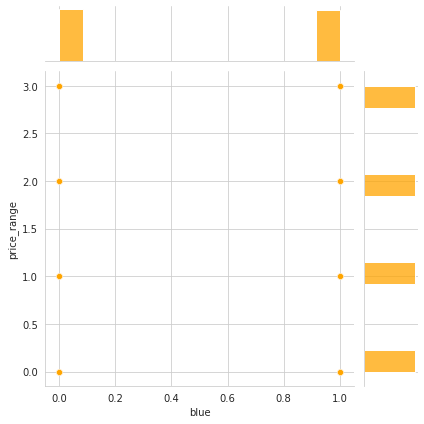

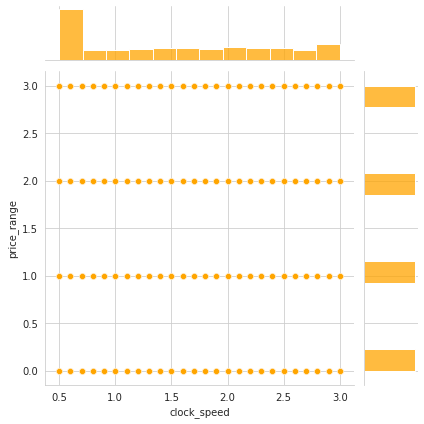

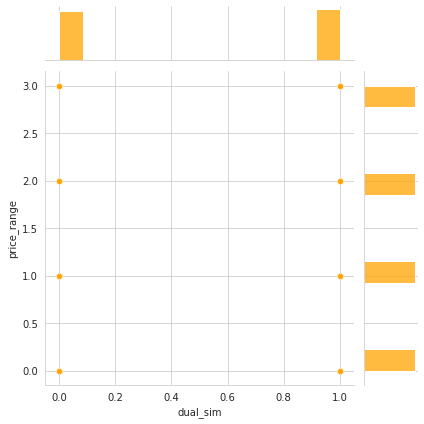

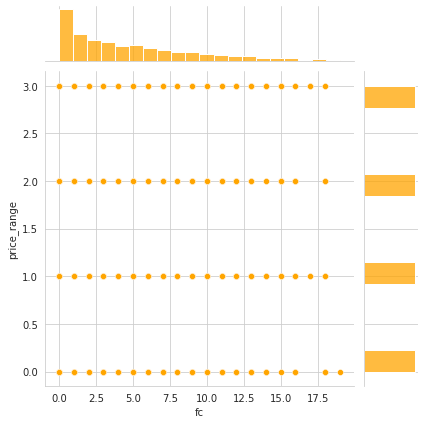

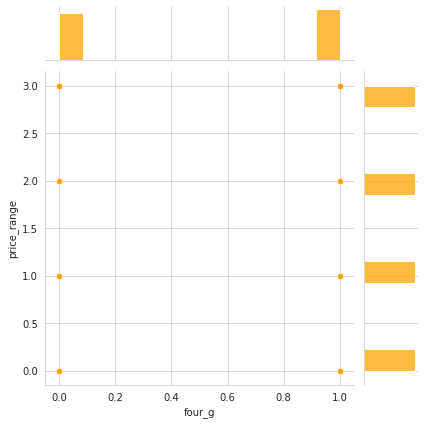

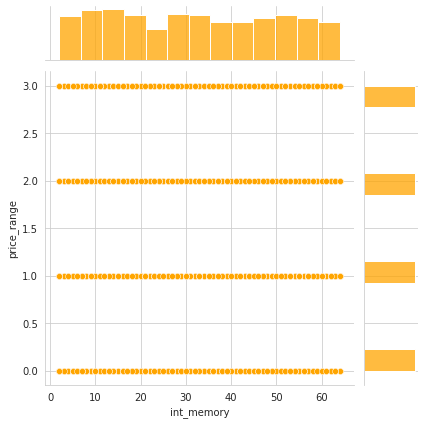

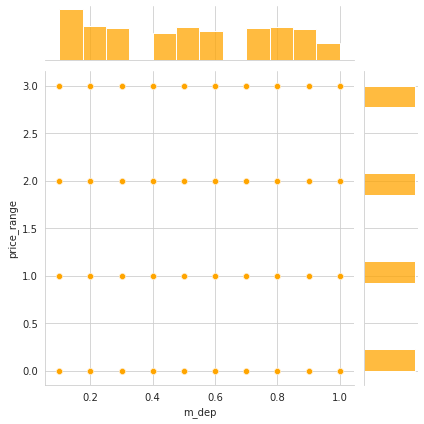

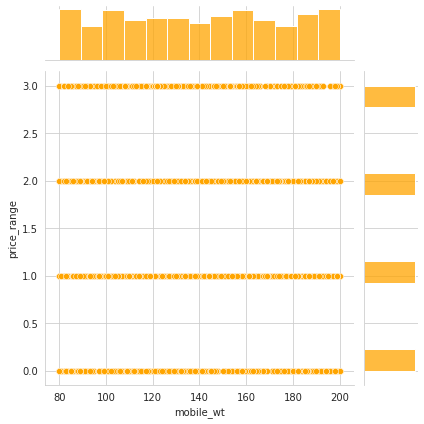

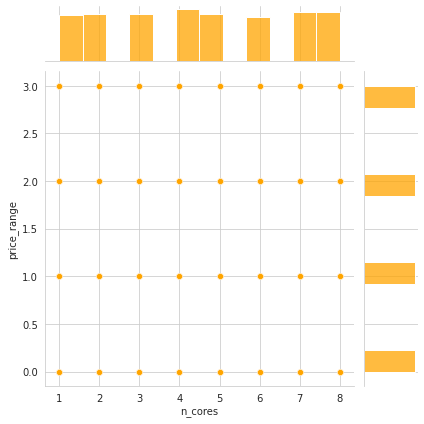

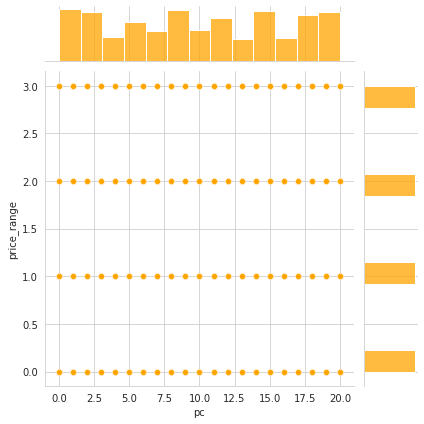

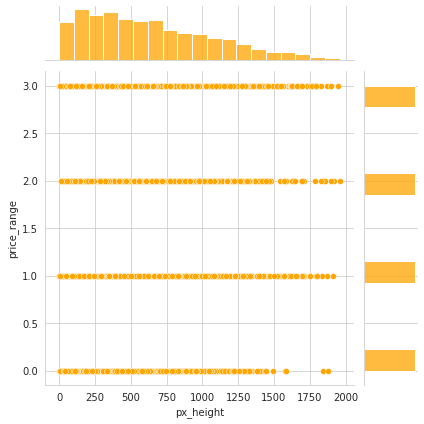

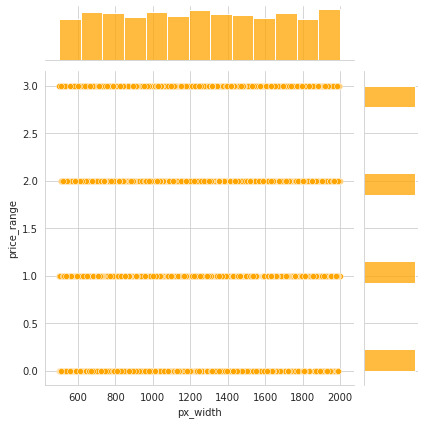

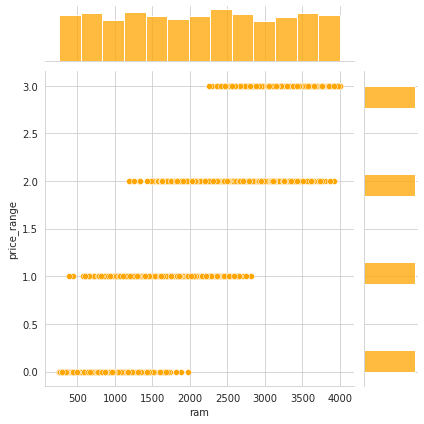

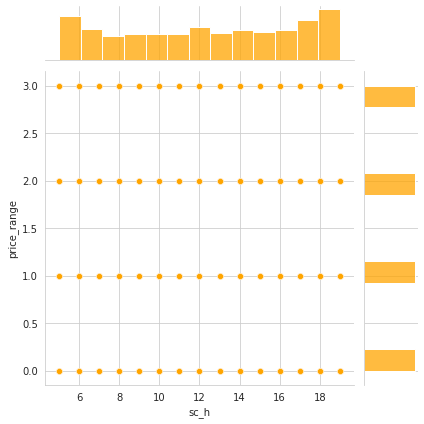

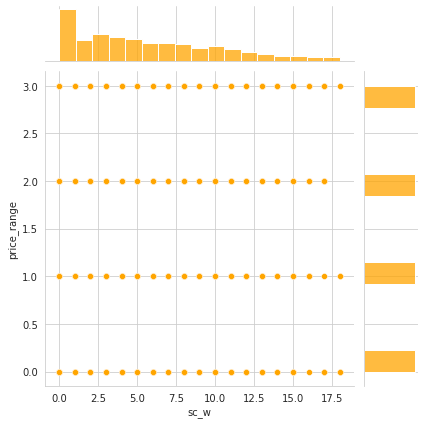

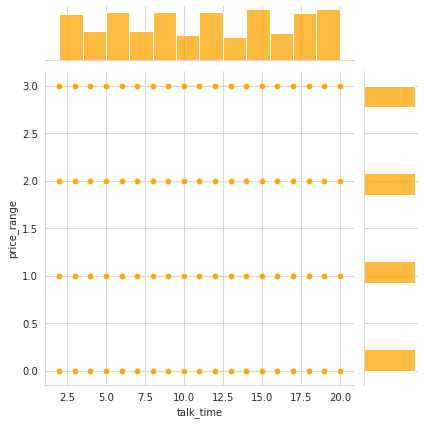

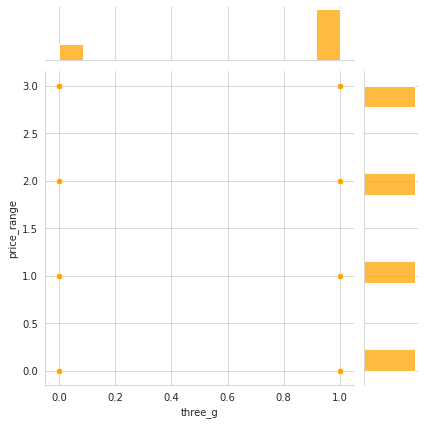

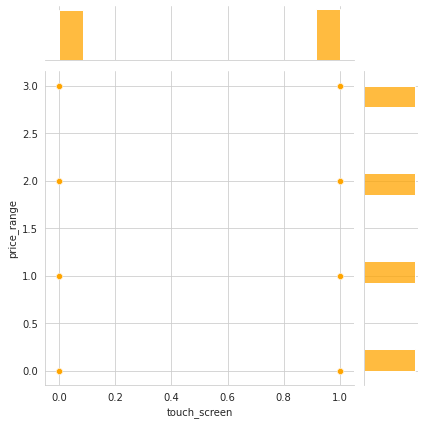

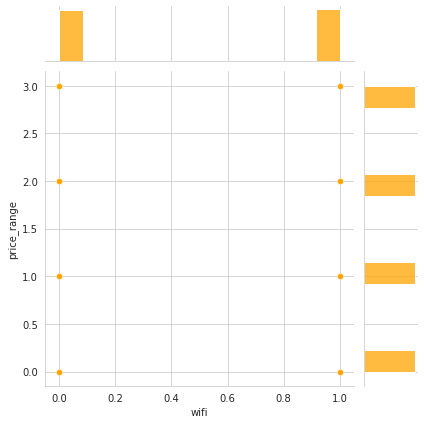

In [15]:
for col in column_names[:-1]:             
    sns.set_style("whitegrid")
    sns.jointplot(y="price_range", x=col, data=df, kind="scatter",color="orange")
plt.show()

##<font color='blue'> **D)Use Groupby function to analyse labled features**

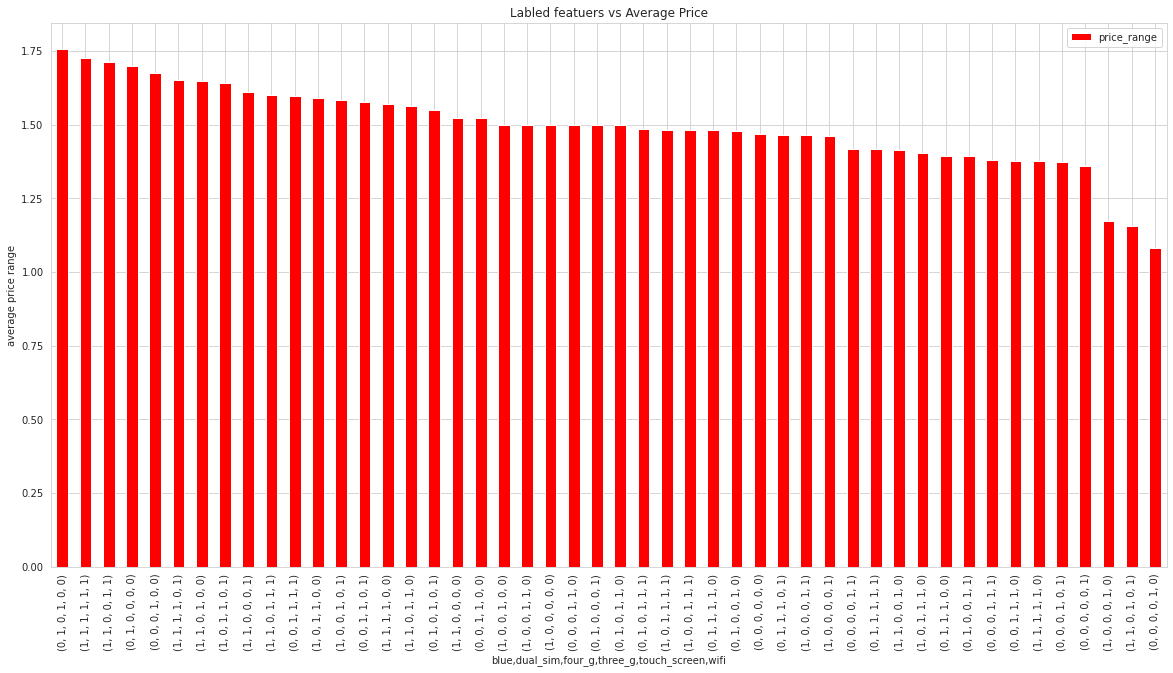

In [16]:
df_autox = pd.DataFrame(df.groupby(["blue","dual_sim","four_g","three_g","touch_screen","wifi"])["price_range"].mean().sort_values(ascending = False)) #grouped by "Holiday" and "Rented Bike Count"
df_autox.plot.bar(color="r",figsize=(20, 10))
plt.ylabel('average price range')
plt.title('Labled featuers vs Average Price')
plt.show()

# **As we know,we have four types of mobile range.So we use "RandomforestClassifier" and "SVM" classification algoritham**

#<font color='red'> **Classification**

In [17]:
x=df.copy()
x=x.drop("price_range",axis=1)
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [18]:
y=pd.DataFrame(df["price_range"])
y

,price_range
0,1
1,2
2,2
3,2
4,1
...,...
1995,0
1996,2
1997,3
1998,0


In [19]:
#Train-Test split
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split( x,y , test_size = 0.1, random_state =0) 
print(X_train.shape)
print(X_test.shape)

(1800, 20)
(200, 20)


In [20]:
X_train.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
1018,1000,1,0.5,0,12,0,63,0.7,179,8,18,1537,1761,3744,11,1,7,0,0,1
655,1994,0,1.5,1,2,1,7,0.5,146,8,7,447,1435,3622,7,0,20,1,0,1
436,685,0,0.5,1,8,1,13,0.8,82,7,15,1091,1203,3210,15,7,2,1,1,1
921,1624,1,2.6,1,0,0,58,1.0,200,3,11,1530,1744,1251,13,4,18,0,1,1
1340,1469,0,0.5,0,3,1,58,0.5,150,7,8,1699,1850,1571,17,16,2,1,0,0


In [21]:
X_test.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
405,1454,1,0.5,1,1,0,34,0.7,83,4,3,250,1033,3419,7,5,5,1,1,0
1190,1092,1,0.5,1,10,0,11,0.5,167,3,14,468,571,737,14,4,11,0,1,0
1132,1524,1,1.8,1,0,0,10,0.6,174,4,1,154,550,2678,16,5,13,1,0,1
731,1807,1,2.1,0,2,0,49,0.8,125,1,10,337,1384,1906,17,13,13,0,1,1
1754,1086,1,1.7,1,0,1,43,0.2,111,6,1,56,1150,3285,11,5,17,1,1,0


In [22]:
y_train.head()

,price_range
1018,3
655,3
436,3
921,1
1340,2


In [23]:
y_test.head()

,price_range
405,3
1190,0
1132,2
731,2
1754,2


# <font color='blue'>**A)RandomForestClassifier**

In [24]:
#Model No 1
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(X_train,y_train)       #fit train data

RandomForestClassifier()

In [25]:
rf.score(X_train,y_train)   #To find accuracy of train data

1.0

In [26]:
rf.score(X_test,y_test)   #To find accuracy of test data

0.865

#<font color='blue'> **B)XGBoostClassifier**

In [27]:
from xgboost import XGBClassifier

xgb=XGBClassifier()

xgb.fit(X_train,y_train)

XGBClassifier(objective='multi:softprob')

In [28]:
xgb.score(X_train, y_train)*100    #To find accuracy of train data

98.61111111111111

In [29]:
xgb.score(X_test,y_test)*100    #To find accuracy of train data

92.5

##<font color='blue'> **C)SVM**

In [30]:
#Model No 2
from sklearn.svm import SVC
sv=SVC(kernel="poly")
sv.fit(X_train, y_train)        #fit train data

SVC(kernel='poly')

In [31]:
sv.score(X_train, y_train)*100    #To find accuracy of train data

95.88888888888889

In [32]:
sv.score(X_test, y_test)*100    #To find accuracy of test data

97.0

In [33]:
sv.intercept_  #To find all intercept values

array([ 3.71609878,  2.3900799 ,  1.58425679,  7.72341857,  3.43156623,
       11.334329  ])

In [34]:
y_train_prd=sv.predict(X_train) #find predicted values
y_train_prd=pd.DataFrame(y_train_prd)

In [35]:
y_train_prd #predicted dataframe on train data

,0
0,3
1,3
2,3
3,1
4,2
...,...
1795,3
1796,1
1797,3
1798,0


In [36]:
y_train

,price_range
1018,3
655,3
436,3
921,1
1340,2
...,...
835,3
1216,1
1653,3
559,0


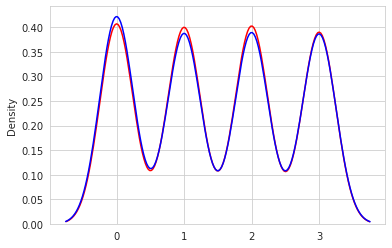

In [37]:
#plot train accuracy 
ax1=sns.distplot(y_train,hist=False,color="r")
sns.distplot(y_train_prd,hist=False,color="b",ax=ax1)

In [38]:
#precision,recall,f1-score,support
from sklearn.metrics import classification_report
matrix = classification_report(y_train,y_train_prd,labels=[0,1,2,3])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98       458
           1       0.96      0.94      0.95       450
           2       0.95      0.93      0.94       453
           3       0.97      0.97      0.97       439

    accuracy                           0.96      1800
   macro avg       0.96      0.96      0.96      1800
weighted avg       0.96      0.96      0.96      1800



In [39]:
y_test_prd=sv.predict(X_test)   #find predicted values
y_test_prd=pd.DataFrame(y_test_prd)

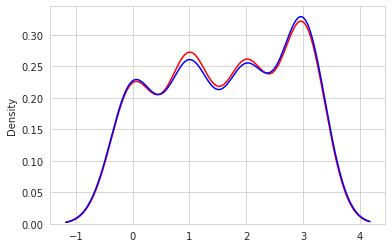

In [40]:
#plot test accuracy 
ax2=sns.distplot(y_test,hist=False,color="r")
sns.distplot(y_test_prd,hist=False,color="b",ax=ax2)

In [41]:
#precision,recall,f1-score,support
from sklearn.metrics import classification_report
matrix = classification_report(y_test,y_test_prd,labels=[0,1,2,3])
print('Classification report : \n',matrix)

Classification report : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99        42
           1       1.00      0.96      0.98        50
           2       0.96      0.94      0.95        47
           3       0.95      0.98      0.97        61

    accuracy                           0.97       200
   macro avg       0.97      0.97      0.97       200
weighted avg       0.97      0.97      0.97       200



<font color='blue'>Principal Componant Analysis used with SVM.

In [42]:
# Applying PCA function on training
from sklearn.decomposition import PCA
 
pca = PCA(n_components = 5)
 
X_train1 = pca.fit_transform(X_train)
X_test1 = pca.transform(X_test)

In [43]:
from sklearn.svm import SVC
sv=SVC(kernel="poly")
sv.fit(X_train1, y_train)        #fit new train data with Support vector machine algorithm

SVC(kernel='poly')

In [44]:
sv.score(X_train1, y_train)*100    #To find accuracy of new train data

95.5

In [45]:
sv.score(X_test1, y_test)*100    #To find accuracy of new test data

95.0

In [46]:
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.66721375, 0.16690996, 0.11104115, 0.05386494, 0.00070812])

#<font color='red'> **Conclusion**

**1)RandomforestClassifier model give perfet accuracy for train data (100 percent) but test data it gives less accuracy (87 percent)**

**2)XGBoost gives 98.6 percent accuracy on train data and 92.5 percent accuracy on test data** 

**3)So we implement SVM classifier.It gives high accuracy so we implement Principal Componant Analysis**

**4)SVM gives really good accuracy for both,**

**Train data-95.88 percent**

**Test data-97 percent**


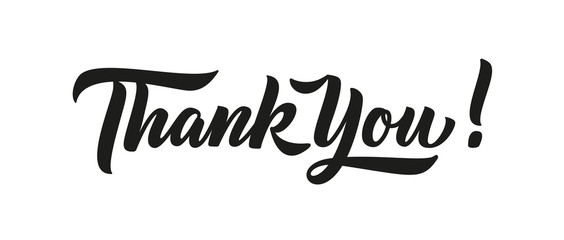